In [1]:
import numpy
import math
from utils import *
from matplotlib import pyplot as plt
from motors import *

from fuel_shooter import ShooterSimulation, FlywheelSimulation

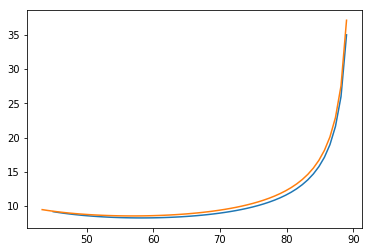

min theta:  28.616362795916828


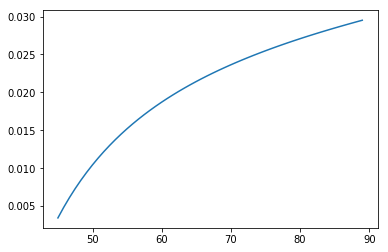

In [2]:
sim = ShooterSimulation(hole_x_pos_m=inch_to_meter(170))

thetas, vmins, vmaxs = sim.gen_min_max_velocities(math.radians(40), math.radians(89))

thetas_deg = numpy.degrees(thetas)

ranges = numpy.abs(vmaxs-vmins)
plt.plot(thetas_deg, vmins)
plt.plot(thetas_deg, vmaxs)
plt.show()
plt.plot(thetas_deg, ranges / ((vmaxs+vmins)))
print ('min theta: ', math.degrees(sim.min_theta_rad()))
plt.show()

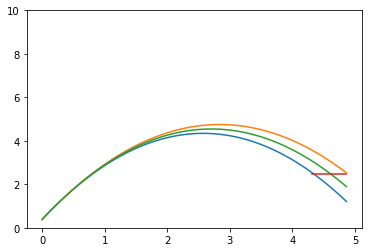

In [3]:
#_, xs1, ys1 = sim.gen_trajectory(math.radians(57.01035), 7.773)
#_, xs2, ys2 = sim.gen_trajectory(math.radians(57.01035), 7.773)
theta = math.radians(72.)
ts1, xs1, ys1 = sim.gen_trajectory(theta, sim.min_velocity_mps(theta))
_, xs2, ys2 = sim.gen_trajectory(theta, sim.max_velocity_mps(theta))
_, xs3, ys3 = sim.gen_trajectory(theta, (sim.min_velocity_mps(theta) + sim.max_velocity_mps(theta)) / 2)
plt.ylim(0, 10)
plt.plot(xs1, ys1)
plt.plot(xs2, ys2)
plt.plot(xs3, ys3)
plt.plot([sim.hole_x_pos_m, sim.hole_x_pos_m+2*sim.hole_radius_m], [sim.hole_y_pos_m, sim.hole_y_pos_m])
#plt.plot(xs2, ys2)
plt.show()

In [4]:
#for theta, vmin, vmax in zip(thetas, vmins, vmaxs):
 #   print (math.degrees(theta), vmin, vmax)

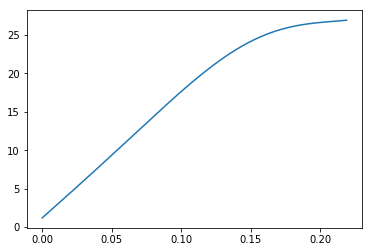

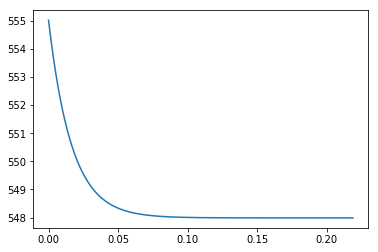

In [32]:
motor_system = MotorSystem(motor=cim, motor_count=1, gearing_ratio=1)
sim = FlywheelSimulation(
    flywheel_initial_velocity_radps=rpm_to_radps(motor_system.free_speed),
    #flywheel_initial_velocity_radps=546.485,
    channel_fuel_static_friction=0.07,
    channel_fuel_kinetic_friction=0.0053,
    fuel_initial_velocity_mps=1.2,
    flywheel_mass_kg=lbs_to_kg(.22),
    compression_force=lbs_to_N(2.4),
    motor_system=motor_system)
sim.run_simulation(dt=0.0001)

plt.plot(sim.ts, sim.vs)
plt.show()
plt.plot(sim.ts, sim.wvs)
plt.show()

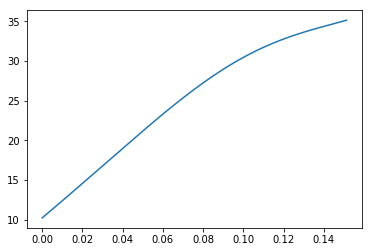

In [6]:
sim = FlywheelSimulation(
        flywheel_initial_velocity_radps=rpm_to_radps(motor_system.free_speed),
        fuel_initial_velocity_mps=10.2,
        motor_system=motor_system)
sim.run_simulation()

plt.plot(sim.ts, sim.vs)
plt.show()